# Figure 6e

## Install and read the R packages

In [ ]:
install.packages("data.table")
install.packages("ggrepel")
install.packages("wesanderson")
library(data.table)
library(ggrepel)
library(tidyverse)
library(wesanderson)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Download and read the sliced Wasserstein kernel matrix in Figure 6e

In [ ]:
system("wget https://www.dropbox.com/s/h59e0y4k95o75mq/fig6.zip")
system("unzip /content/fig6.zip")
K <- fread("/content/fig6/fig6_wasserstein_kernel_result.tsv")
condition <- sapply(strsplit(colnames(K),"_"),function(x){x[1]})
filenames <- colnames(K)

## Figure 6e

Too few points to calculate an ellipse



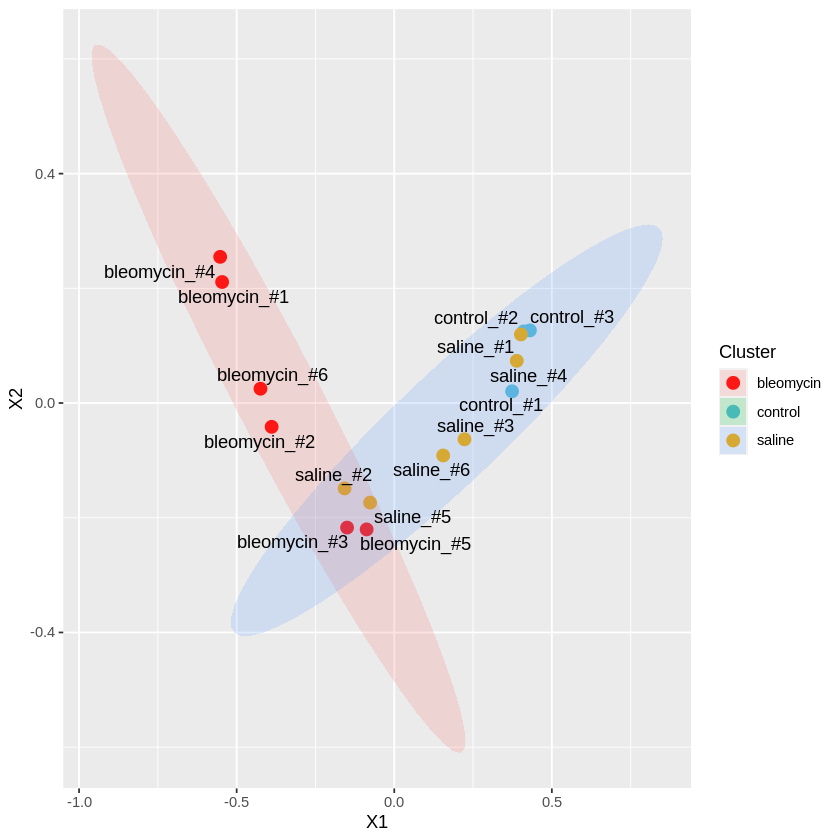

In [ ]:
obj <- cmdscale(dist(1-K))
df <- data.frame(X1=obj[,1],X2=obj[,2],type=factor(condition),label=filenames)
write.table(df,"fig6e.tsv",row.names=FALSE,col.names=TRUE,sep="\t",quote=FALSE)
color <- wes_palette("Darjeeling1", length(unique(condition)), type = "continuous")
set.seed(12345)
color <- sample(color)
color <- color[c(2,3,1)]
ggplot(df, aes(x = X1, y = X2, label = label)) +
  geom_point(aes(x=X1, y=X2, color=factor(type)), size=5, shape=20) +
  stat_ellipse(aes(x=X1,y=X2,fill=factor(type)),
               geom="polygon", level=0.95, alpha=0.2) +
               scale_color_manual(values = color) +
  geom_text_repel() + 
  guides(color=guide_legend("Cluster"),fill=guide_legend("Cluster")) +
  theme(plot.title = element_text(hjust = 0.5))